## Importing required Libraries

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

## Loading the  dataset

In [2]:
# Loading deliveries csv file
PATH = 'deliveries.csv'
deliveries_df = pd.read_csv(PATH)
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
#shape
deliveries_df.shape 

(179078, 21)

In [4]:
deliveries_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

####  All the datatypes of the columns in the DataFrame are confirmed to be correct."

In [5]:
# Loading matches csv
PATH = 'matches.csv'
matches_df = pd.read_csv(PATH) 
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
#shape
matches_df.shape  

(756, 18)

In [7]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### All column datatypes are correct except for the 'date' column.

## Data cleaning

In [8]:
# checking is there any values in the deliveries dataset
deliveries_df.isnull().sum() 

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [9]:
# checking null values in the matches dataset
matches_df.isnull().sum() 

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### There are a significant number of missing values in the 'player_dismissed,' 'dismissal_kind,' and 'fielder' columns in deviliveries dataset and there are some null values in 'city', player_of_match', 'umpire1','umpire2' and ' umpire3' features in matches dataset.

### removing null values in deliveries dataset

In [10]:
# Replace null values in 'player_dismissed', 'dismissal_kind', and 'fielder' columns with 'No'
deliveries_df['player_dismissed']=deliveries_df['player_dismissed'].fillna('No')
deliveries_df['dismissal_kind']=deliveries_df['dismissal_kind'].fillna('No')
deliveries_df['fielder']=deliveries_df['fielder'].fillna('No')  

In [11]:
deliveries_df.isnull().sum() 

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [12]:
deliveries_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### removing null values in matches dataset

In [13]:
# Replace null values with 'No' for object columns
matches_df['city']=matches_df['city'].replace({None: 'No'})
matches_df['winner']=matches_df['winner'].replace({None: 'No'})
matches_df['player_of_match']=matches_df['player_of_match'].replace({None: 'No'})
matches_df['umpire1']=matches_df['umpire1'].replace({None: 'No'})
matches_df['umpire2']=matches_df['umpire2'].replace({None: 'No'})
matches_df['umpire3']=matches_df['umpire3'].replace({None: 'No'})

In [14]:
matches_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          756 non-null    ob

In [15]:
matches_df.isnull().sum() 

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

### Exploratory Data Analysis

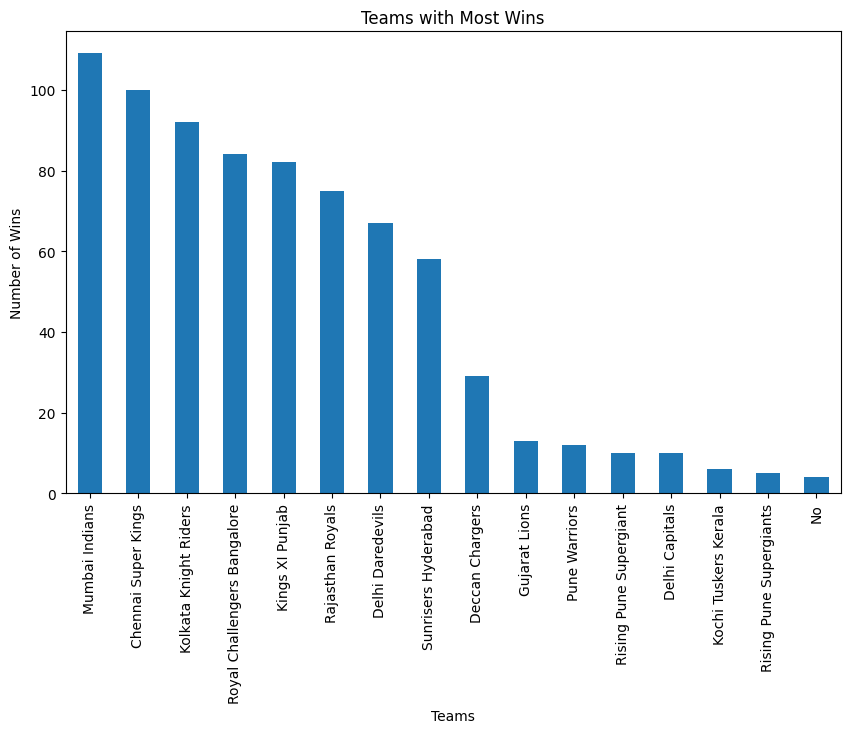

In [16]:
# Teams with Most Wins
plt.figure(figsize=(10, 6))
matches_df['winner'].value_counts().plot(kind='bar')
plt.title('Teams with Most Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

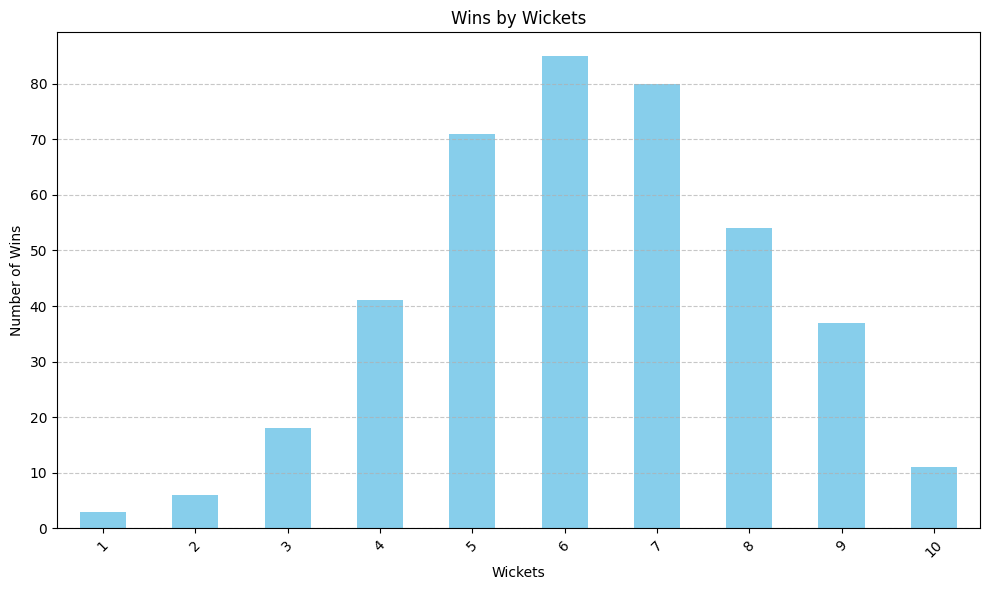

In [17]:
# wicket-based wins
wicket_wins = matches_df[matches_df['win_by_wickets'] > 0]['win_by_wickets'].value_counts().sort_index()

# Plotting bar plot for wins by wickets
plt.figure(figsize=(10, 6))
wicket_wins.plot(kind='bar', color='skyblue')
plt.title('Wins by Wickets')
plt.xlabel('Wickets') 
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

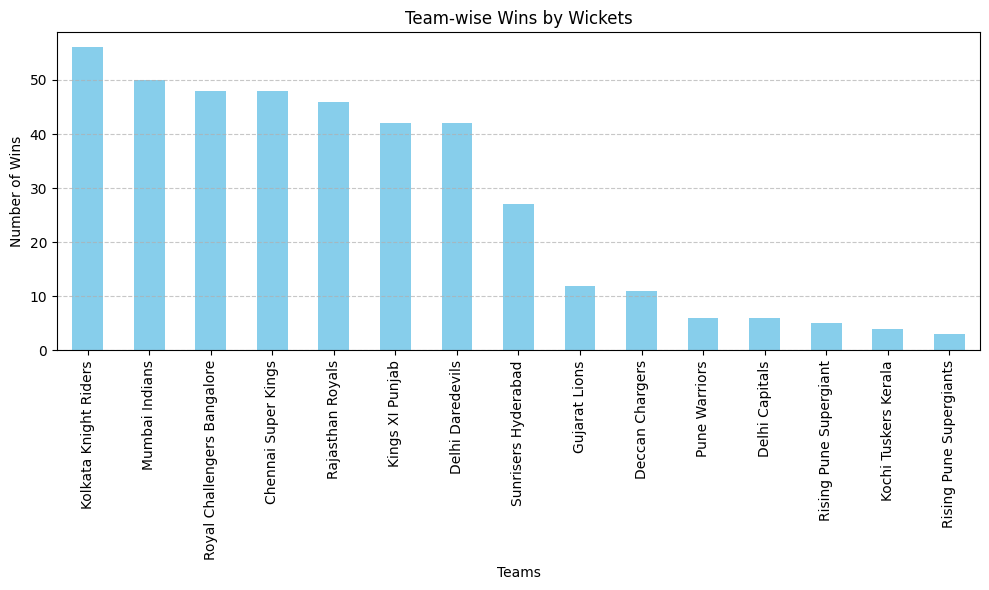

In [18]:
# Teams win by wickets
wicket_wins_by_team = matches_df[matches_df['win_by_wickets'] > 0]['winner'].value_counts()

plt.figure(figsize=(10, 6))
wicket_wins_by_team.plot(kind='bar', color='skyblue') 
plt.title('Team-wise Wins by Wickets')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

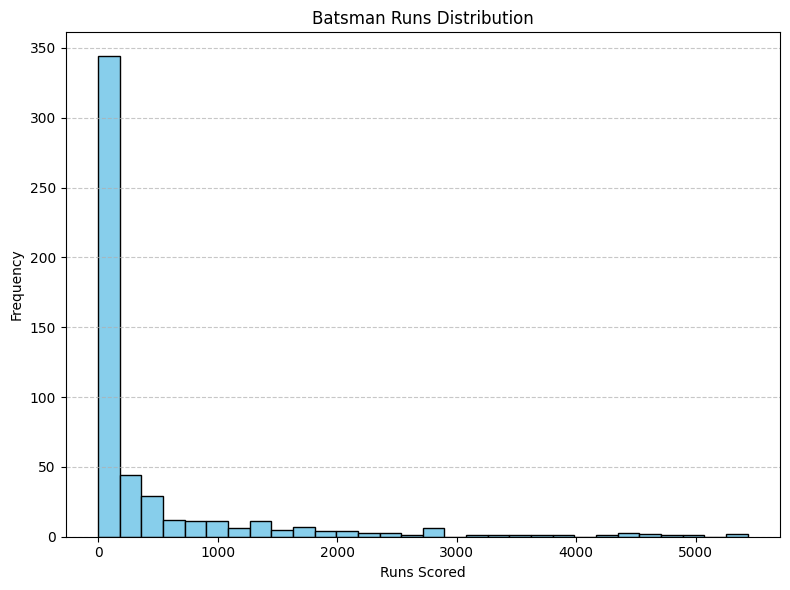

In [19]:
# Batsman Runs Distribution
batsman_runs = deliveries_df.groupby('batsman')['batsman_runs'].sum()

# Plotting histogram for batsman runs distribution
plt.figure(figsize=(8, 6))
plt.hist(batsman_runs, bins=30, color='skyblue', edgecolor='black')
plt.title('Batsman Runs Distribution')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

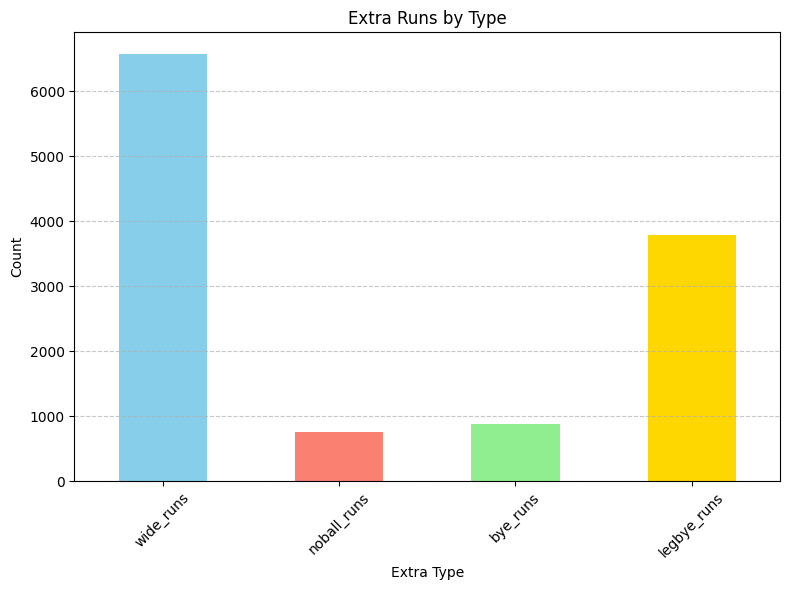

In [20]:
# Extra Runs by Type
extra_runs = deliveries_df[['wide_runs', 'noball_runs', 'bye_runs', 'legbye_runs']].sum()

# Plotting bar plot for extra runs by type
plt.figure(figsize=(8, 6))
extra_runs.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Extra Runs by Type')
plt.xlabel('Extra Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

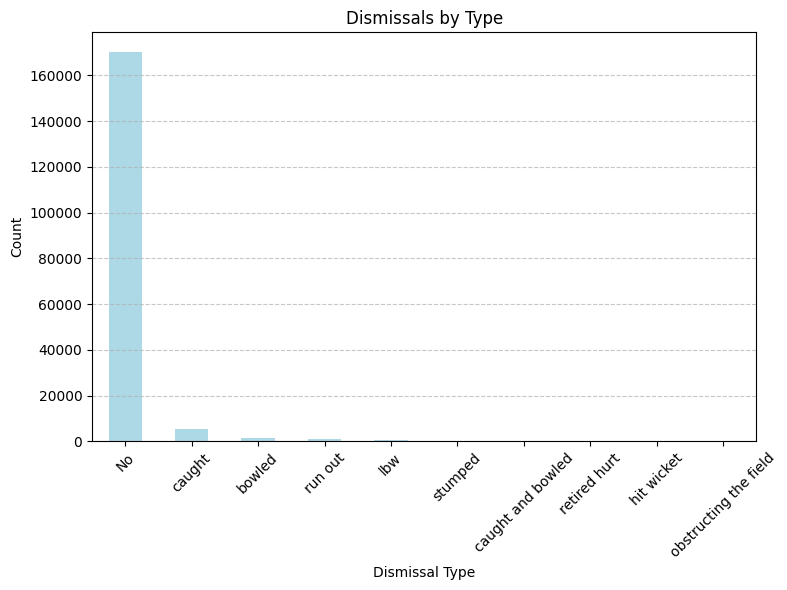

In [21]:
# Counting dismissals by type
dismissals_by_type = deliveries_df['dismissal_kind'].value_counts()

# Plotting bar plot for dismissals by type
plt.figure(figsize=(8, 6))
dismissals_by_type.plot(kind='bar', color='lightblue')
plt.title('Dismissals by Type')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

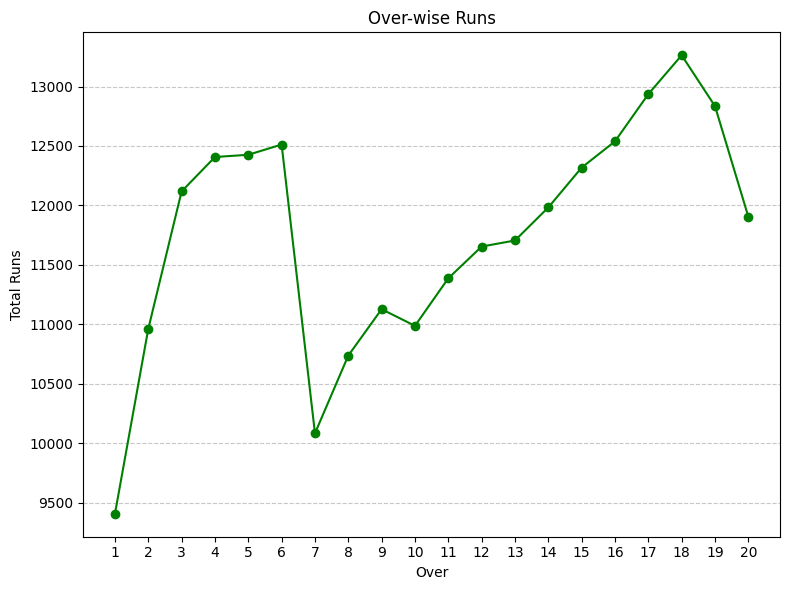

In [22]:
# Over-wise Runs
runs_by_over = deliveries_df.groupby('over')['total_runs'].sum()

# Plotting line plot for over-wise runs
plt.figure(figsize=(8, 6))
runs_by_over.plot(kind='line', marker='o', color='green')
plt.title('Over-wise Runs')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.xticks(runs_by_over.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Boundaries')

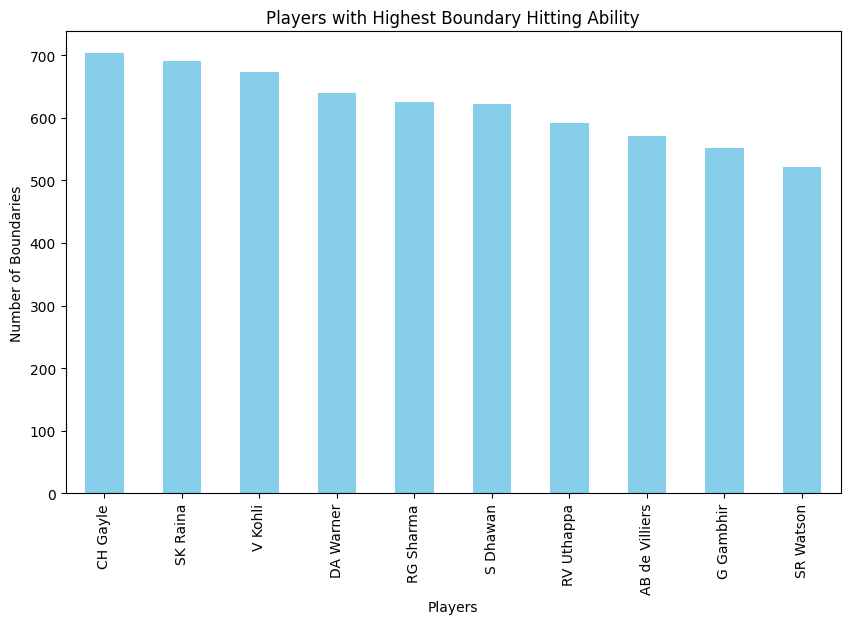

In [23]:
boundary_counts = deliveries_df[deliveries_df['batsman_runs'].isin([4, 6])]['batsman'].value_counts()

# Selecting the top 10 players with the highest boundary count
top_boundary_players = boundary_counts.head(10)

# Plotting the players with the highest hard-hitting ability
plt.figure(figsize=(10, 6))
top_boundary_players.plot(kind='bar', color='skyblue')
plt.title('Players with Highest Boundary Hitting Ability')
plt.xlabel('Players')
plt.ylabel('Number of Boundaries')

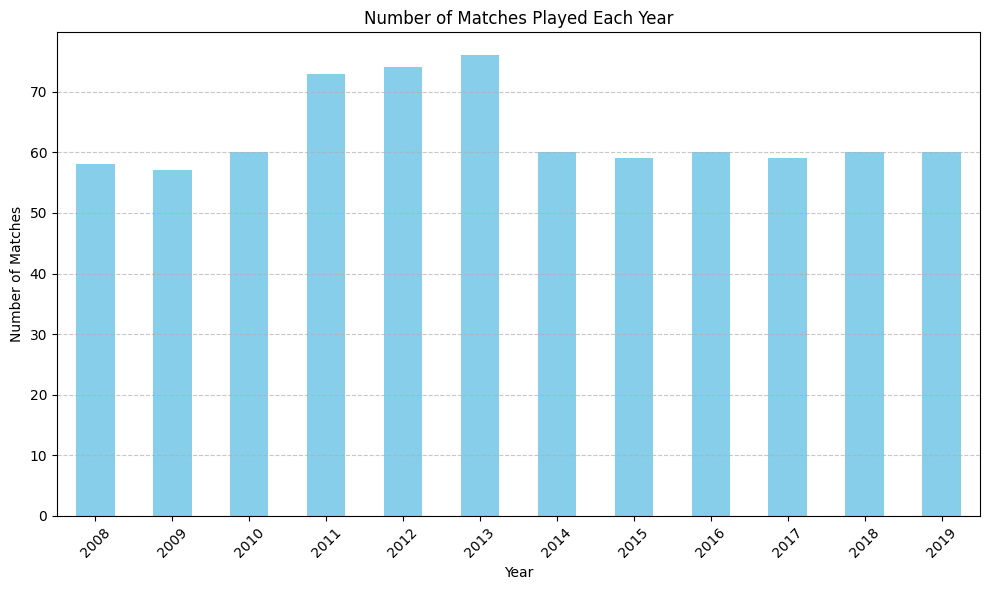

In [24]:
# Number of matches played in each year
matches_per_year = matches_df['season'].value_counts().sort_index()

# Plotting the number of matches per year
plt.figure(figsize=(10, 6))
matches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

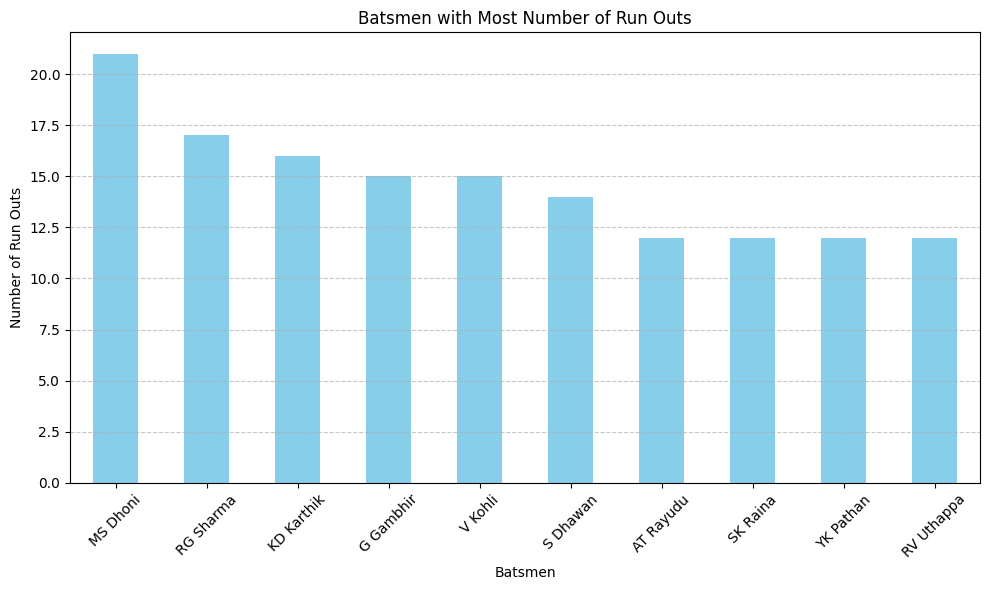

In [25]:
# Filtering rows where dismissal type is 'run out'
run_outs = deliveries_df[deliveries_df['dismissal_kind'] == 'run out']

# Counting run outs for each batsman
batsman_run_out_counts = run_outs['batsman'].value_counts().head(10)  # Change 'head(10)' to your desired number

# Plotting the batsmen with the most run-outs
plt.figure(figsize=(10, 6))
batsman_run_out_counts.plot(kind='bar', color='skyblue')
plt.title('Batsmen with Most Number of Run Outs')
plt.xlabel('Batsmen')
plt.ylabel('Number of Run Outs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

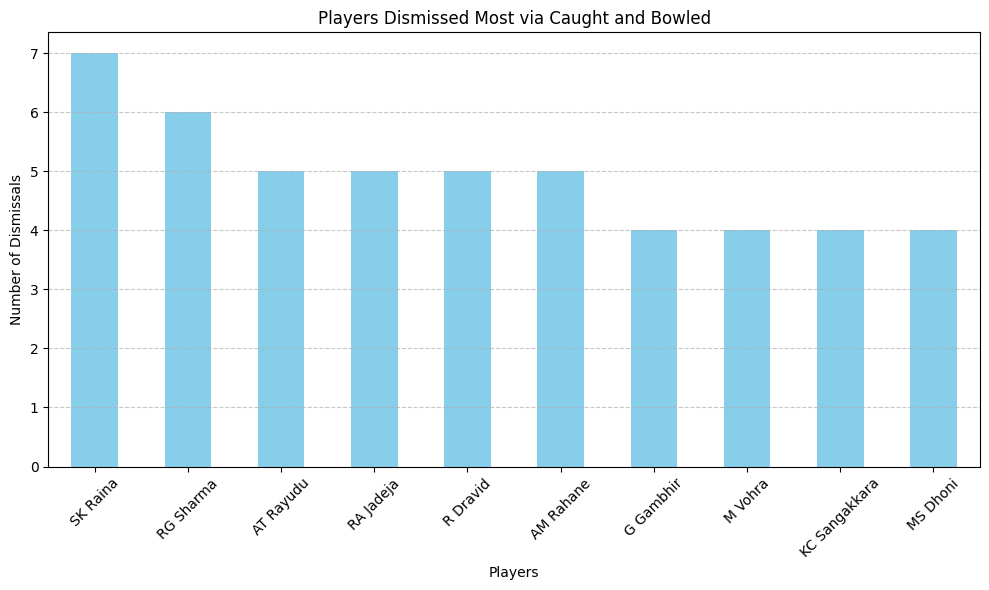

In [26]:
# Across all seasons players dismissed the maximum number of times via caught and bowled
caught_and_bowled_dismissals = deliveries_df[deliveries_df['dismissal_kind'] == 'caught and bowled']

# Counting occurrences of 'caught and bowled' dismissals for each player
player_caught_and_bowled_count = caught_and_bowled_dismissals['batsman'].value_counts().head(10)  # Adjust number of players

# Plotting the players dismissed the most via 'caught and bowled'
plt.figure(figsize=(10, 6))
player_caught_and_bowled_count.plot(kind='bar', color='skyblue')
plt.title('Players Dismissed Most via Caught and Bowled')
plt.xlabel('Players')
plt.ylabel('Number of Dismissals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

## Questions

#### 1. Which of the following is the right way to merge 2 datasets for getting better insights from the data

In [27]:
merged_data = pd.merge(deliveries_df,matches_df, left_on='match_id', right_on='id') 

In [28]:
merged_data 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


#### 2.The column which has the most missing values according to the data is

In [29]:
matches_df.isnull().sum()  

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

#### 3.City which hosted most number of seasons according to the data is:

In [30]:
matches_df['city'].value_counts()

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
No                  7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [31]:
most_hosted_city = matches_df['city'].value_counts().idxmax()

print("City which hosted most number of seasons:", most_hosted_city)

City which hosted most number of seasons: Mumbai


#### 4. Which year has the most number of matches played?

In [32]:
matches_df['season'].value_counts() 

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

In [33]:
most_matches_year = matches_df['season'].value_counts().idxmax()

print("Year with the most number of matches played:", most_matches_year) 

Year with the most number of matches played: 2013


#### 5. Maximum wins by Mumbai Indians in 2011 are:

In [34]:
mumbai_wins_2011 = matches_df[(matches_df['winner'] == 'Mumbai Indians') & (matches_df['season'] == 2011)]
max_wins_mumbai_2011 = mumbai_wins_2011['winner'].count()

print("Maximum wins by Mumbai Indians in 2011:", max_wins_mumbai_2011) 

Maximum wins by Mumbai Indians in 2011: 10


#### 6.For 'toss_decision' feature what kind of plot is suitable?

In [35]:
matches_df["toss_decision"].value_counts() 

toss_decision
field    463
bat      293
Name: count, dtype: int64

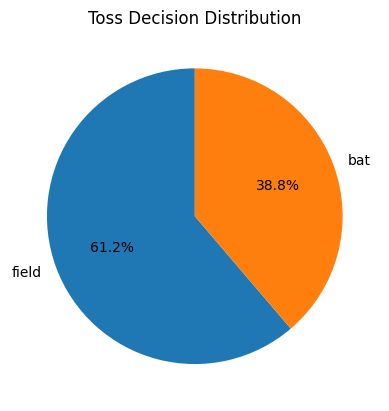

In [36]:
toss_decision_count = matches_df['toss_decision'].value_counts()

# Plotting a pie chart
plt.pie(toss_decision_count, labels=toss_decision_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision Distribution')
plt.show()  

#### 7.  What is the percentage of getting bat and field in feature 'toss_descision'?

In [37]:
toss_decision_percentage = matches_df['toss_decision'].value_counts(normalize=True) * 100

print("Percentage of 'bat': {:.1f}%".format(toss_decision_percentage['bat']))
print("Percentage of 'field': {:.1f}%".format(toss_decision_percentage['field']))  

Percentage of 'bat': 38.8%
Percentage of 'field': 61.2%


#### 8.Which statement holds true
- A) Teams winning tosses and electing field first have won more number of matches.
- B) Teams winning tosses and electing bat first have won more number of matches.
- C) Both A and B
- D) None of the above 

In [38]:
toss_winner_and_match_winner = matches_df[matches_df['toss_winner'] == matches_df['winner']]

# matches won by teams choosing to field first
field_first_wins = toss_winner_and_match_winner[toss_winner_and_match_winner['toss_decision'] == 'field']['winner'].count()
print('field_first_wins:',field_first_wins)

# matches won by teams choosing to bat first
bat_first_wins = toss_winner_and_match_winner[toss_winner_and_match_winner['toss_decision'] == 'bat']['winner'].count()
print('bat_first_wins:',bat_first_wins) 

field_first_wins: 259
bat_first_wins: 134


In [39]:
# Calculate the number of wins for each toss decision
bat_wins = matches_df[matches_df['toss_decision'] == 'bat']['winner'].count()
field_wins = matches_df[matches_df['toss_decision'] == 'field']['winner'].count()

# Compare the number of wins
if bat_wins > field_wins:
    print("Teams winning tosses and electing bat first have won more number of matches.")
elif field_wins > bat_wins:
    print("Teams winning tosses and electing field first have won more number of matches.")
else:
    print("Both A and B have an equal number of wins.") 


Teams winning tosses and electing field first have won more number of matches.


#### 9. In which years where taking batting second have won more number of matches?

In [40]:
batting_second_wins = matches_df[(matches_df['toss_decision']=='field')&(matches_df['winner']==matches_df['toss_winner'])]
batting_second_wins['season'].value_counts() 

season
2016    32
2019    31
2017    28
2011    27
2018    27
2014    24
2008    19
2012    18
2013    15
2009    14
2015    14
2010    10
Name: count, dtype: int64

#### 10. To plot the most consistent batsmen among top 10 run getters, what plotting technique we use?

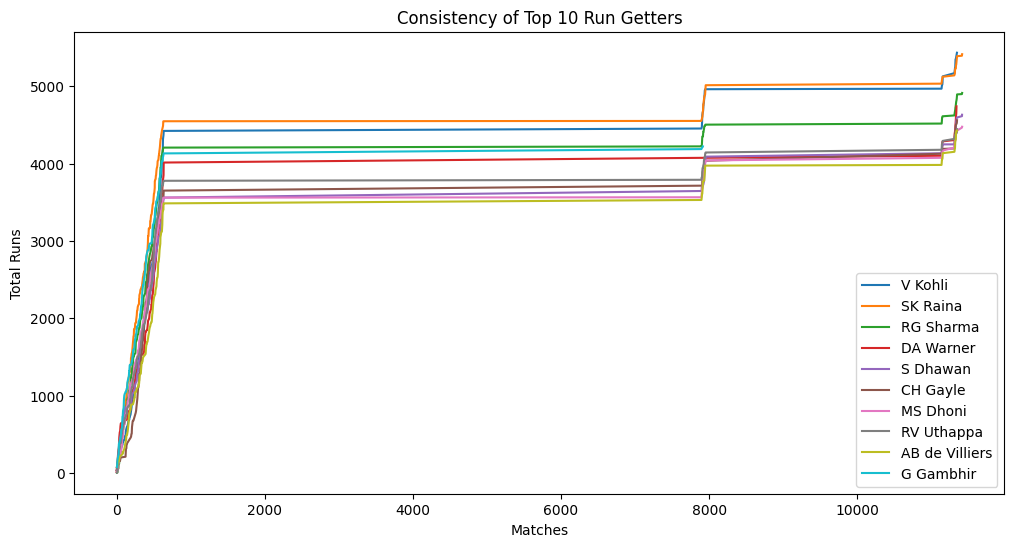

In [41]:
# Calculate total runs for each batsman
total_runs_by_batsman = deliveries_df.groupby('batsman')['batsman_runs'].sum()

# Select the top 10 run-getters
top_10_run_getters = total_runs_by_batsman.nlargest(10).index

# Plotting a line plot for each batsman
plt.figure(figsize=(12, 6))
for batsman in top_10_run_getters:
    batsman_data = deliveries_df[deliveries_df['batsman'] == batsman].groupby('match_id')['batsman_runs'].sum().cumsum()
    plt.plot(batsman_data, label=batsman)

plt.title('Consistency of Top 10 Run Getters')
plt.xlabel('Matches')
plt.ylabel('Total Runs') 
plt.legend() 
plt.show()

#### 11. In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [42]:
merged_data = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')
runs_from_boundaries_2019 = merged_data[(merged_data['season'] == 2019) & ((merged_data['batsman_runs'] == 4) 
                                                                           | (merged_data['batsman_runs'] == 6))]
total_runs_by_batsman = runs_from_boundaries_2019.groupby('batsman')['batsman_runs'].sum()

highest_runs_batsman = total_runs_by_batsman.idxmax()
 
print("Batsman who scored the highest number of runs by hitting 6's and 4's in 2019:", highest_runs_batsman)


Batsman who scored the highest number of runs by hitting 6's and 4's in 2019: AD Russell


#### 12. Most number of wickets taken by a bowler is


In [43]:
# Filter for rows where a wicket was taken
wickets_data = deliveries_df[deliveries_df['player_dismissed'].notnull()]

# Calculate the number of wickets taken by each bowler
wickets_count_by_bowler = wickets_data['bowler'].value_counts()

# Find the bowler with the most number of wickets 
most_wickets_bowler = wickets_count_by_bowler.idxmax()

print("Bowler who has taken the most number of wickets:", most_wickets_bowler) 

Bowler who has taken the most number of wickets: Harbhajan Singh


#### 13.  What is the strike rate of Kohli in 2016

In [44]:
# Merge the 'deliveries' and 'matches' DataFrames based on 'match_id'
merged_data = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')

# Filter for Virat Kohli's innings in 2016
kohli_2016 = merged_data[(merged_data['batsman'] == 'V Kohli') & (merged_data['season'] == 2016)]

# Calculate total runs and total balls faced by Kohli in 2016
total_runs_kohli = kohli_2016['batsman_runs'].sum()
total_balls_faced_kohli = kohli_2016.shape[0]

# Calculate the strike rate
strike_rate_kohli = (total_runs_kohli / total_balls_faced_kohli) * 100

print("Virat Kohli's strike rate in 2016:", round(strike_rate_kohli, 2)) 

Virat Kohli's strike rate in 2016: 148.55


#### 14.  Bowlers with maximum number of extras:


In [45]:
# Extract relevant columns for calculations
extras_df = deliveries_df[['bowler', 'extra_runs']]

# Group by bowler and calculate the total number of extras
extras_by_bowler = extras_df.groupby('bowler')['extra_runs'].sum().reset_index()

# Find the bowler with the maximum number of extras 
max_extras_bowler = extras_by_bowler.loc[extras_by_bowler['extra_runs'].idxmax()]

print("Bowler with the maximum number of extras:", max_extras_bowler['bowler'])
print("Number of extras:", max_extras_bowler['extra_runs'])

Bowler with the maximum number of extras: SL Malinga
Number of extras: 293


#### 15. Which venue has hosted most number of IPL matches?

In [46]:
venue_counts = matches_df['venue'].value_counts()

# Find the venue with the maximum number of matches
max_matches_venue = venue_counts.idxmax() 

print("Venue that has hosted the most number of IPL matches:", max_matches_venue) 

Venue that has hosted the most number of IPL matches: Eden Gardens


#### 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?


In [47]:
# Filter the data for the specified match
match_info = matches_df[(matches_df['team1'] == 'Sunrisers Hyderabad') & (matches_df['team2'] == 'Royal Challengers Bangalore') & (matches_df['season'] == 2017)]

# Extract the player of the match for that specific match
player_of_the_match = match_info['player_of_match'].values[0] 

print(" Sunrisers Hyderabad vs Royal Challengers Bangalore match in 2017:", player_of_the_match) 

 Sunrisers Hyderabad vs Royal Challengers Bangalore match in 2017: Yuvraj Singh


#### 17. Across seasons who are the top three batsman's with most number of run out? 

In [48]:
run_outs_df = deliveries_df[['batsman', 'player_dismissed', 'dismissal_kind', 'fielder']]
run_outs_df = run_outs_df[run_outs_df['dismissal_kind'] == 'run out'] 

run_out_counts = run_outs_df.groupby('batsman')['player_dismissed'].count().reset_index()

# Sort the batsmen based on the number of run-outs in descending order
run_out_counts = run_out_counts.sort_values(by='player_dismissed', ascending=False)

# Get the top three batsmen
top_three_run_out_batsmen = run_out_counts.head(3)

print("Top three batsmen with the most number of run-outs across seasons:")
print(top_three_run_out_batsmen[['batsman', 'player_dismissed']])

Top three batsmen with the most number of run-outs across seasons:
        batsman  player_dismissed
152    MS Dhoni                21
195   RG Sharma                17
112  KD Karthik                16


#### 18. What are the total runs scored by V Kohli when the bowler was JJ Burmah? 

In [49]:
kohli_vs_bumrah = deliveries_df[(deliveries_df['batsman'] == 'V Kohli') & (deliveries_df['bowler'] == 'JJ Bumrah')]

# Calculate the total runs scored by V Kohli against JJ Bumrah
total_runs_by_kohli_vs_bumrah = kohli_vs_bumrah['batsman_runs'].sum()

print("Total runs scored by V Kohli against JJ Bumrah:", total_runs_by_kohli_vs_bumrah)

Total runs scored by V Kohli against JJ Bumrah: 112


#### 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled

In [50]:
caught_and_bowled_df = deliveries_df[deliveries_df['dismissal_kind'] == 'caught and bowled']

# Group by batsman and count the number of caught and bowled dismissals
caught_and_bowled_counts = caught_and_bowled_df.groupby('batsman')['player_dismissed'].count().reset_index()

# Find the player with the maximum number of caught and bowled dismissals
max_caught_and_bowled_player = caught_and_bowled_counts.loc[caught_and_bowled_counts['player_dismissed'].idxmax()]

print("Player dismissed the maximum number of times via caught and bowled across all seasons:", max_caught_and_bowled_player['batsman'])
print("Number of times dismissed via caught and bowled:", max_caught_and_bowled_player['player_dismissed'])

Player dismissed the maximum number of times via caught and bowled across all seasons: SK Raina
Number of times dismissed via caught and bowled: 7


#### 20. which player has the highest hard-hitting ability 

In [51]:
sixes_by_player = deliveries_df[deliveries_df['batsman_runs'] == 6]

# Count the number of sixes hit by each batsman
sixes_count = sixes_by_player['batsman'].value_counts().reset_index()
sixes_count.columns = ['Player', 'Sixes']
 
# Display the players and their respective number of sixes hit
print(sixes_count)  

             Player  Sixes
0          CH Gayle    327
1    AB de Villiers    214
2          MS Dhoni    207
3          SK Raina    195
4         RG Sharma    194
..              ...    ...
331     Sunny Singh      1
332       R McLaren      1
333   Anirudh Singh      1
334         A Nehra      1
335        TA Boult      1

[336 rows x 2 columns]
